# White Wine Predict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
ad=pd.read_csv("/content/drive/MyDrive/DATAMINIMG_PROJECT/wineQualityWhites.csv")
df=ad.copy()
df.head()


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed.acidity         4898 non-null   float64
 2   volatile.acidity      4898 non-null   float64
 3   citric.acid           4898 non-null   float64
 4   residual.sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free.sulfur.dioxide   4898 non-null   float64
 7   total.sulfur.dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [ ]:
df=df.iloc[:,1:len(df)]
df.head()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
column_name=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']
df.columns=column_name
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.describe().T
#Transpose has been applied to see the summary statistics of the numerical columns in the DataFrame in a more organized way.

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [ ]:
df.isnull().values.any()


False

*We made a visualization based on the line above to see if there are null values. In this way, we can see how many empty values are in each row. If there were empty values in our data, we would clear or fill these values to a certain extent.*

In [ ]:
 import plotly.express as px

# Determine the null values:
dfNullVals = df.isnull().sum().to_frame()
dfNullVals = dfNullVals.rename(columns = {0:'Null'})
# Determine the not null values:
dfNotNullVals = df.notna().sum().to_frame()
dfNotNullVals = dfNotNullVals.rename(columns = {0:'Not Null'})
# Combine the dataframes:
dfNullCount = pd.concat([dfNullVals, dfNotNullVals], ignore_index=False, axis=1).reset_index()
dfNullCount = dfNullCount.rename(columns = {'index':'Category'})
# Generate Plot
fig = px.bar(dfNullCount, x="Category", y = ['Not Null', 'Null'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title={'text':"Null Values Visualization",
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    xaxis_title = "Category",
    yaxis_title = "Count")
fig.update_layout(legend_title_text = 'Status')
fig.show()

In [ ]:
df["quality"].value_counts()
#Counts the number of times each different quality value occurs in this column.



6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:

df.corr()
#Calculates the correlation matrix between numerical columns.
#1: Perfect positive correlation (when one variable increases, the other also increases).
#0: No correlation (no linear relationship between variables).
#-1: Perfect negative correlation (when one variable increases, the other decreases).

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


# Data Visualization

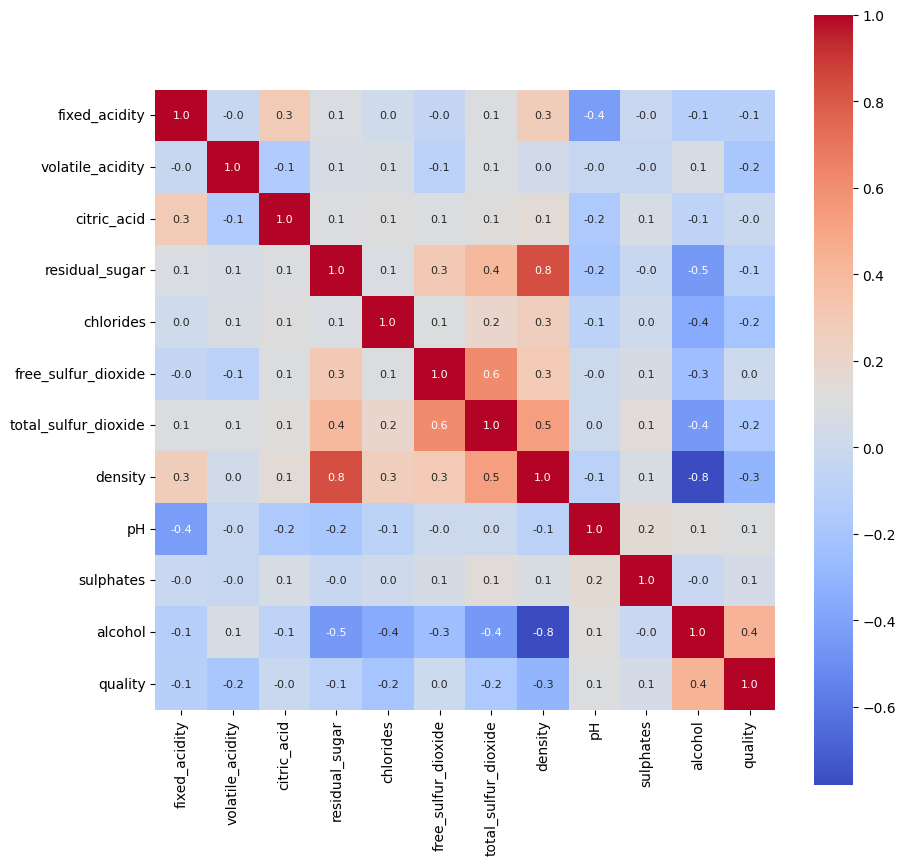

In [ ]:

correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,square=True, cbar=True ,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm');

*The probability density function was plotted on the left using plt.subplots, and the data was interpreted using a box plot in a single cell on the right for more in-depth information. We compared the other 11 columns in our data with "quality," as that was the value we were trying to predict. --Check out the graphics below.--*

<ipython-input-186-bd69acc2c45b>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




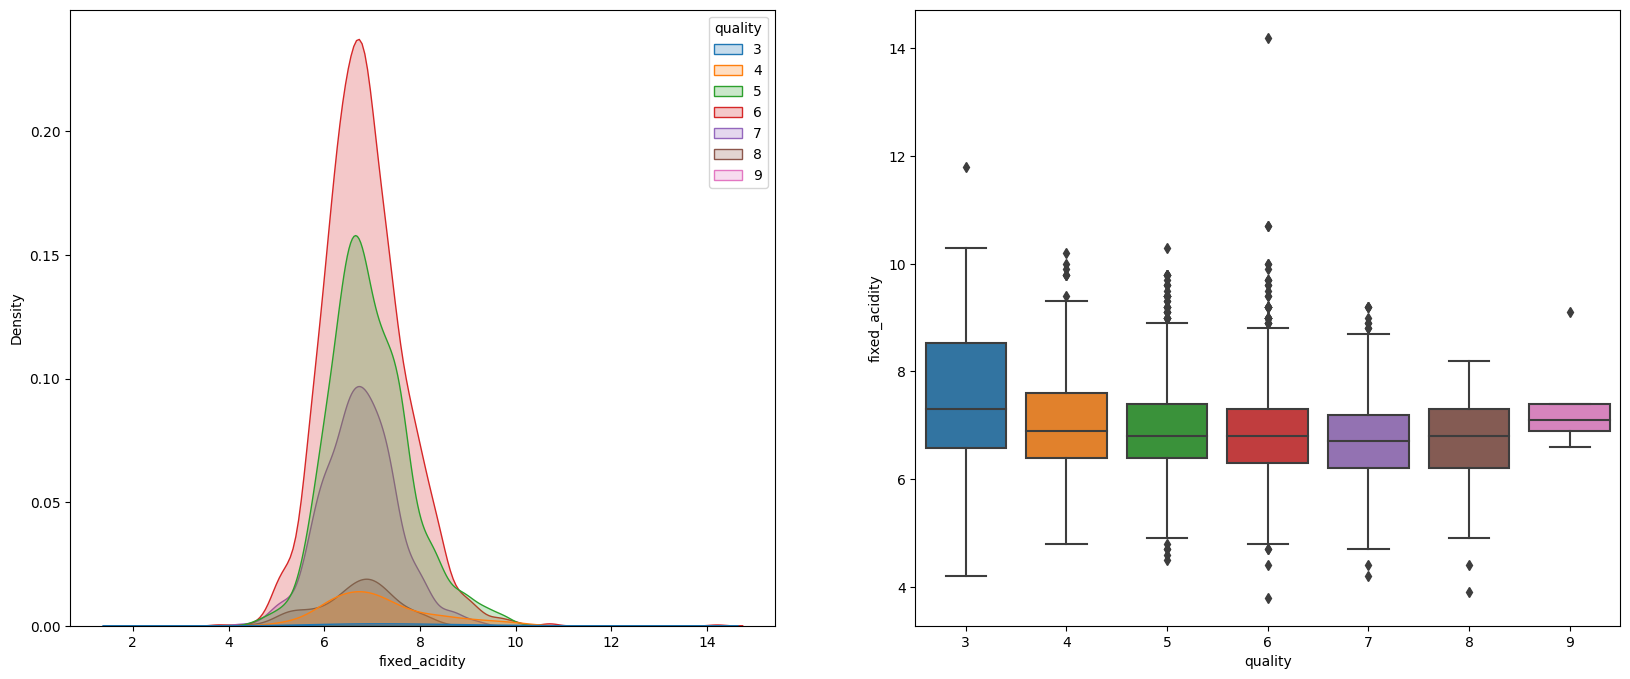

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="fixed_acidity",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="fixed_acidity",data=df,ax=ax2);



<ipython-input-187-6dd156df2c32>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




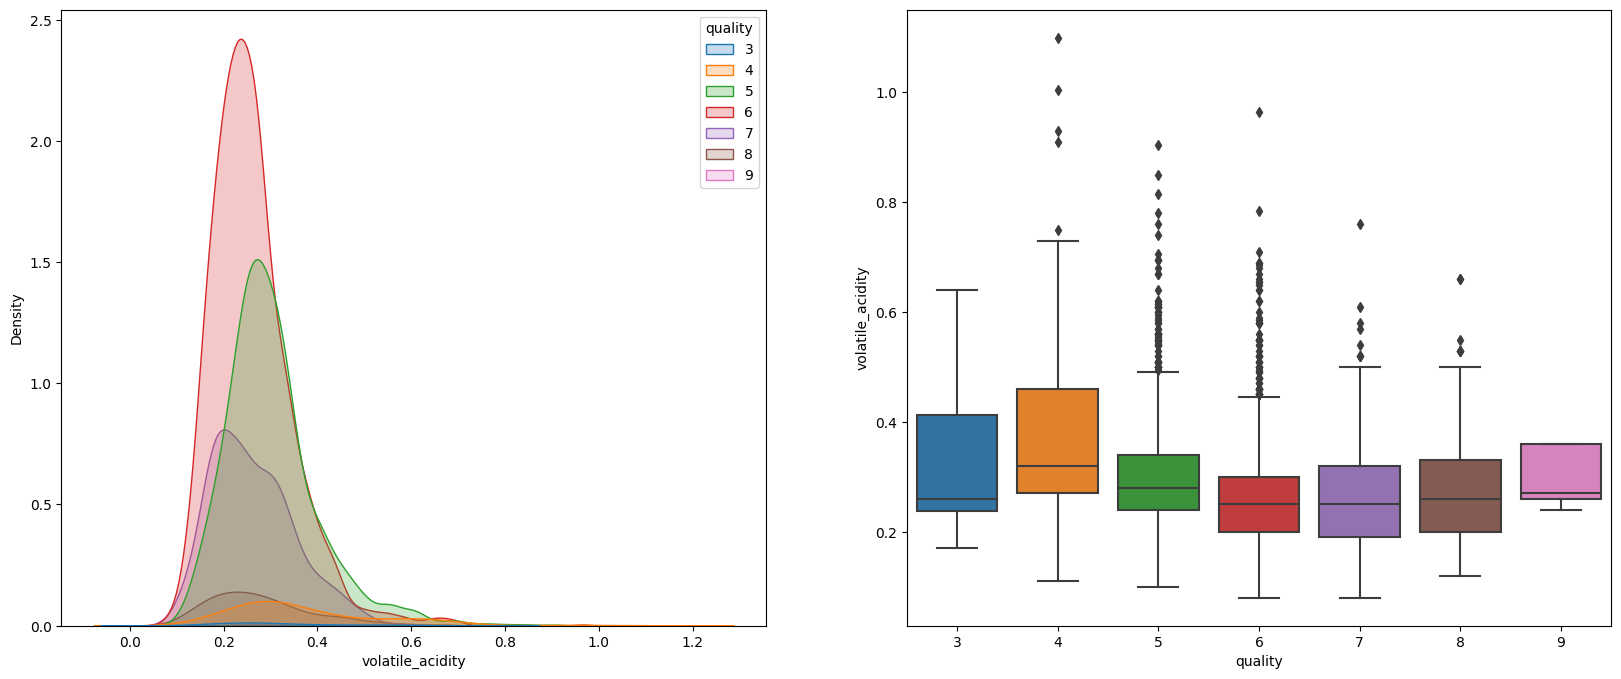

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="volatile_acidity",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="volatile_acidity",data=df,ax=ax2);



<ipython-input-188-b22cc891457d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




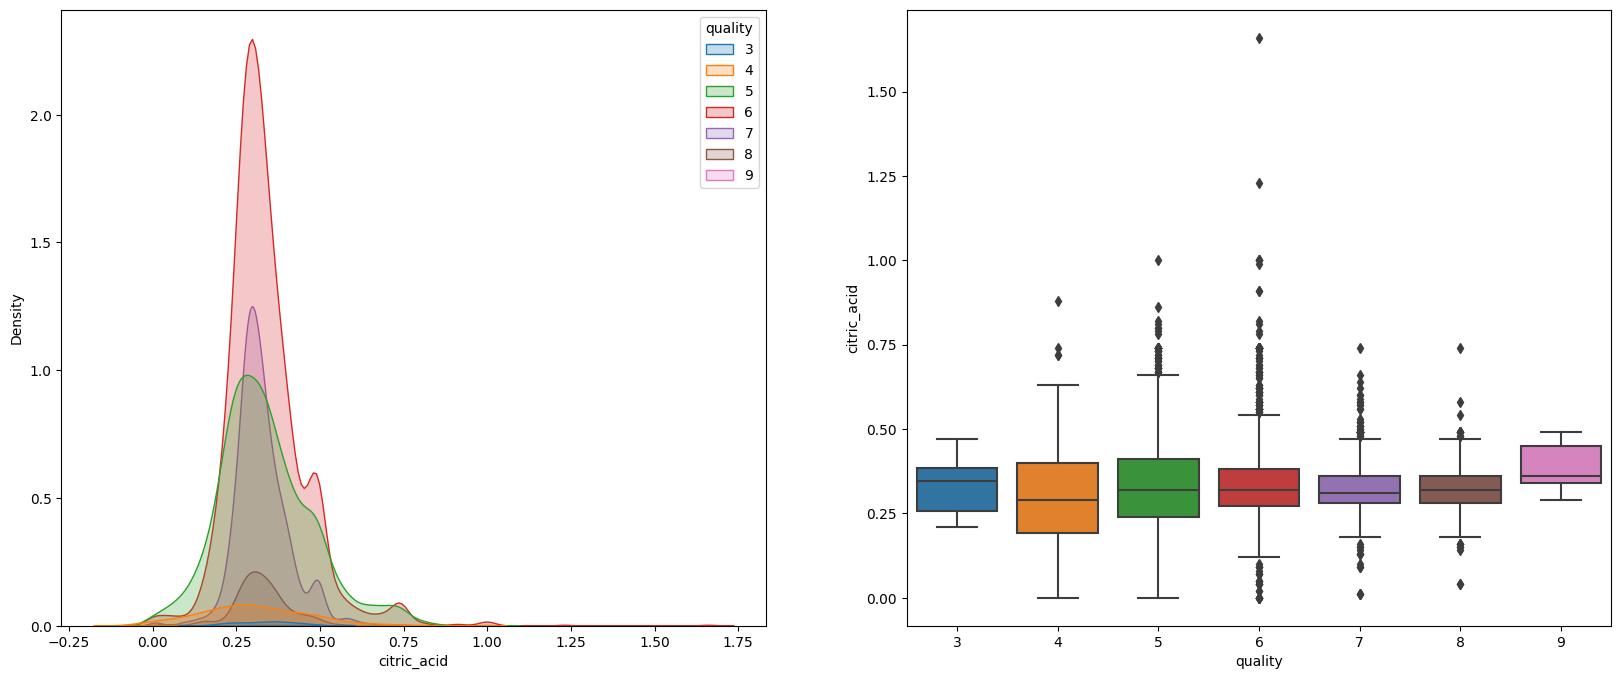

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="citric_acid",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="citric_acid",data=df,ax=ax2);



<ipython-input-189-eb4443941ae8>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




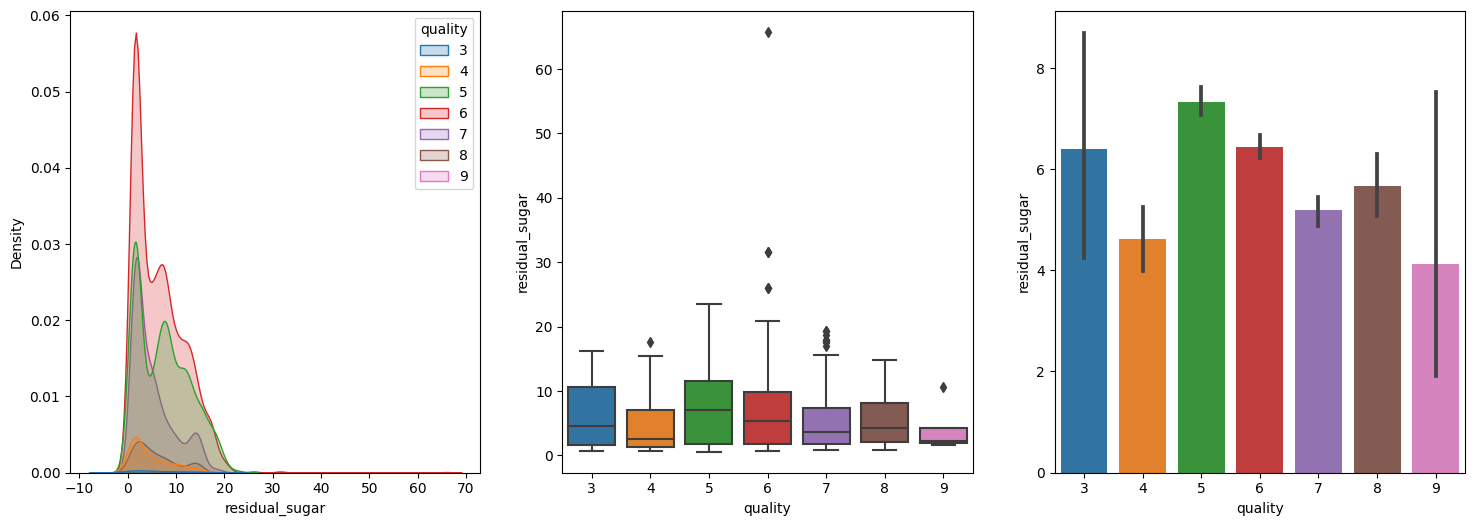

In [ ]:
fig, (ax1, ax2 , ax3) = plt.subplots(1,3, figsize=(18,6))
sns.kdeplot(data=df,x="residual_sugar",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="residual_sugar",data=df,ax=ax2);
sns.barplot(x="quality",y="residual_sugar",data=df,ax=ax3);



<ipython-input-190-862a14e20bde>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




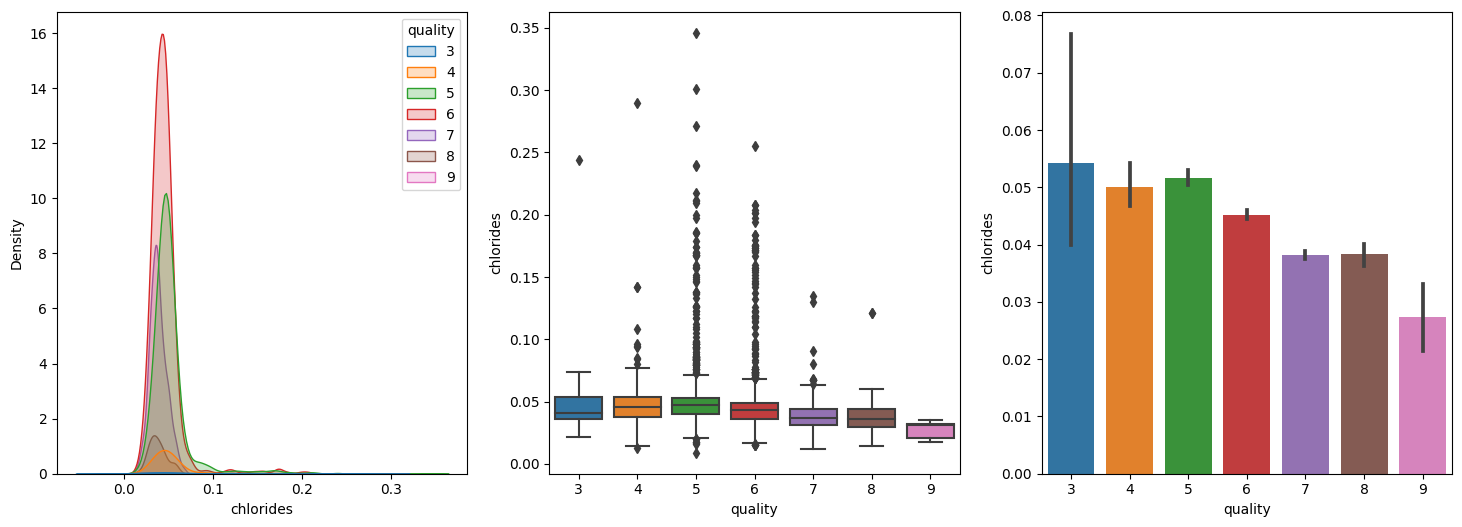

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
sns.kdeplot(data=df,x="chlorides",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="chlorides",data=df,ax=ax2);
sns.barplot(x="quality",y="chlorides",data=df,ax=ax3);



<ipython-input-191-6ad14372d66b>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




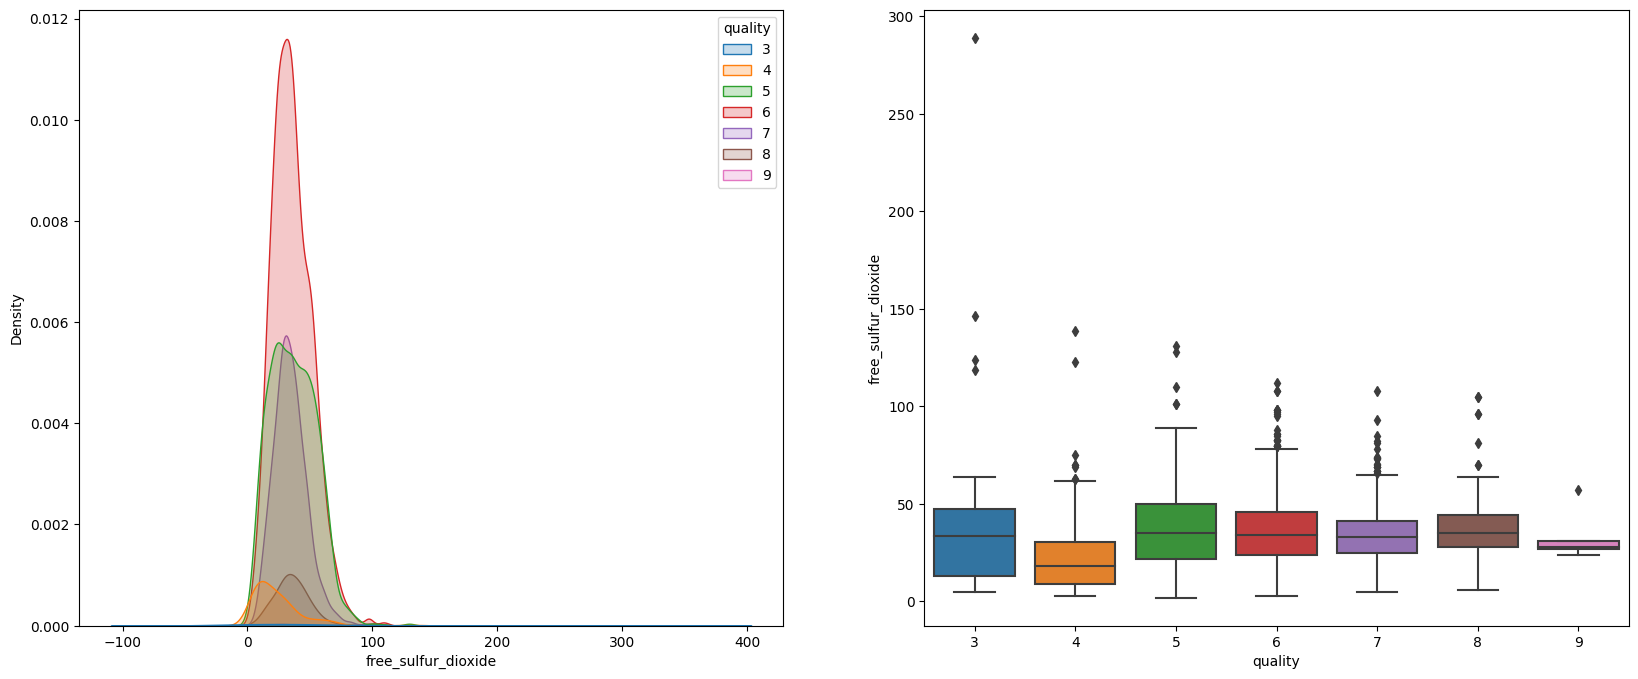

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="free_sulfur_dioxide",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="free_sulfur_dioxide",data=df,ax=ax2);



<ipython-input-192-98d3ef17379a>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




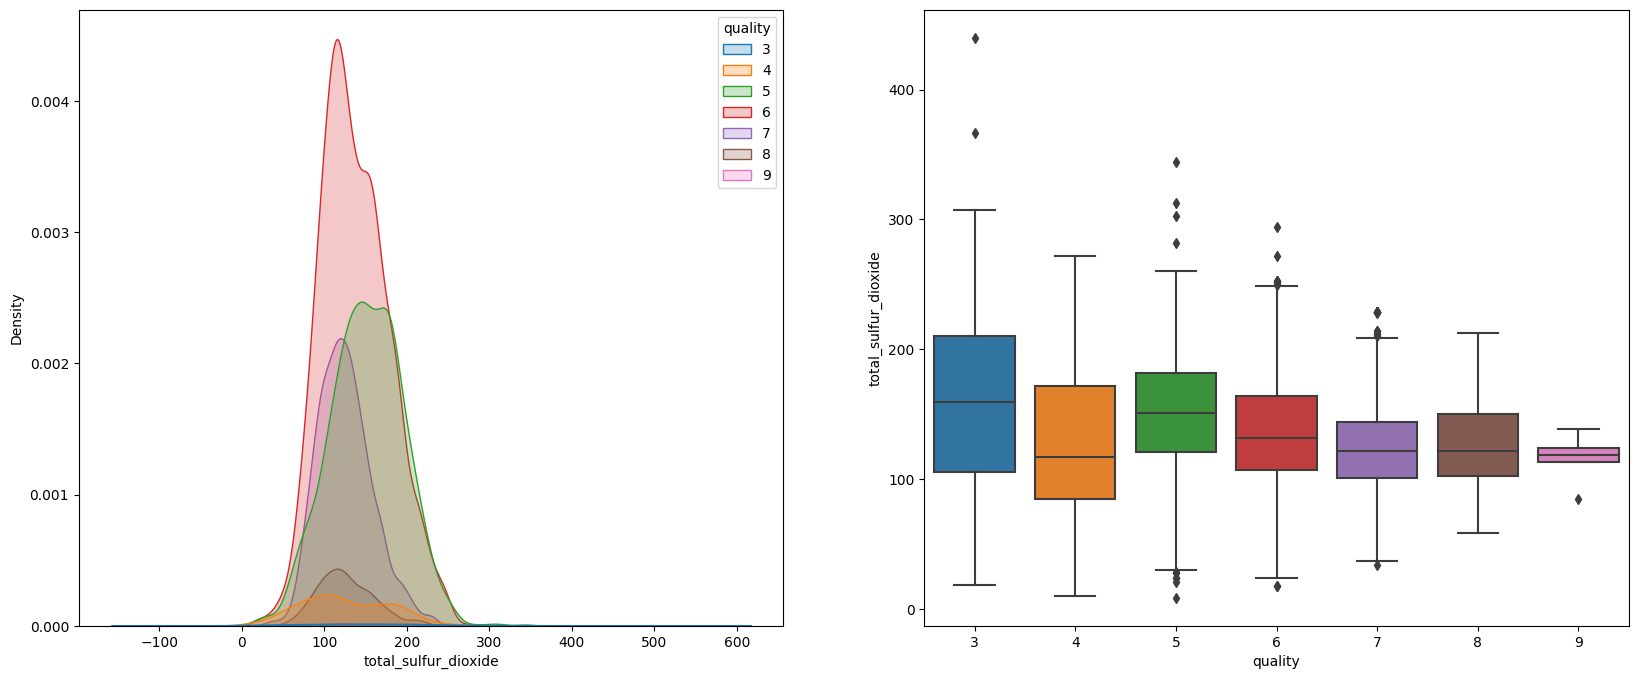

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="total_sulfur_dioxide",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="total_sulfur_dioxide",data=df,ax=ax2);



<ipython-input-193-b374b407c42a>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




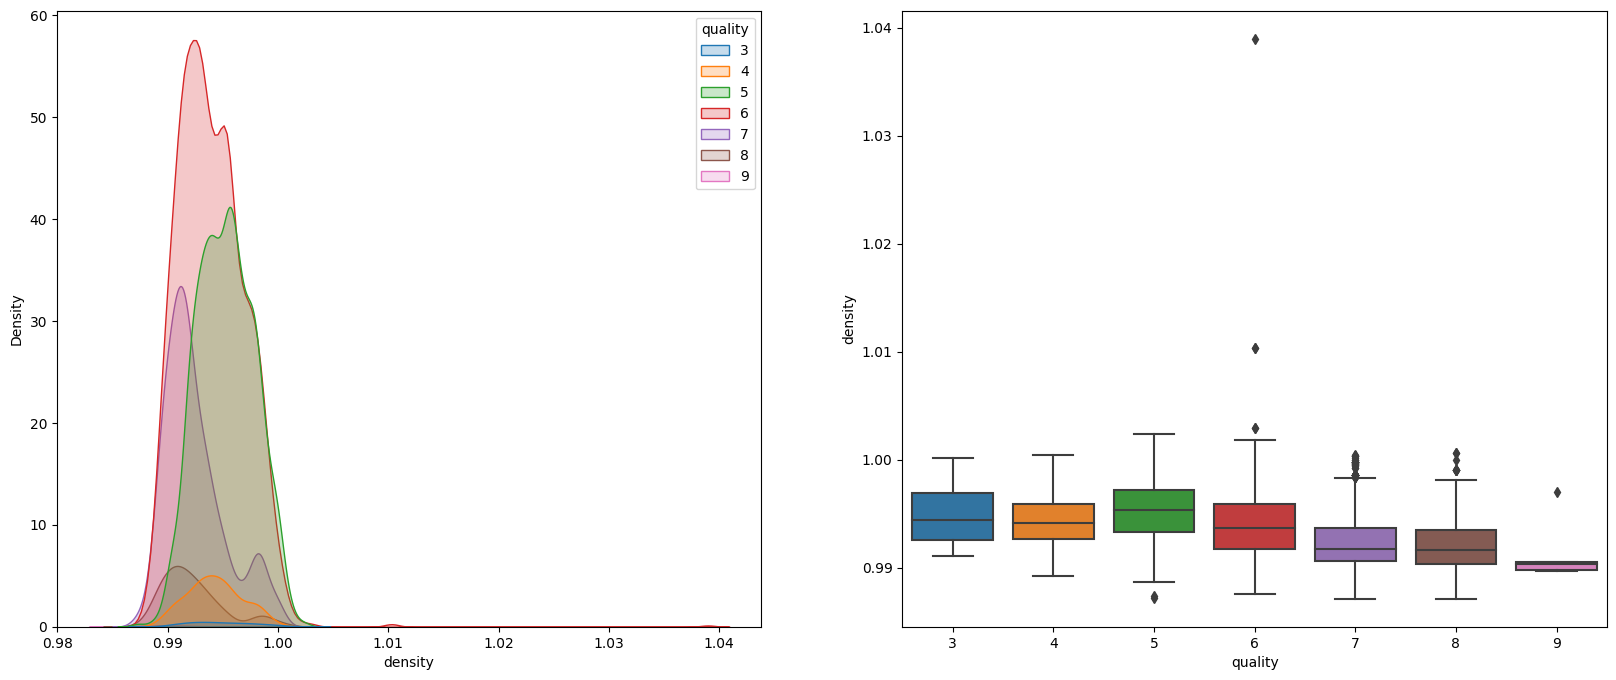

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="density",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="density",data=df,ax=ax2);



<ipython-input-194-aa7342604e9d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




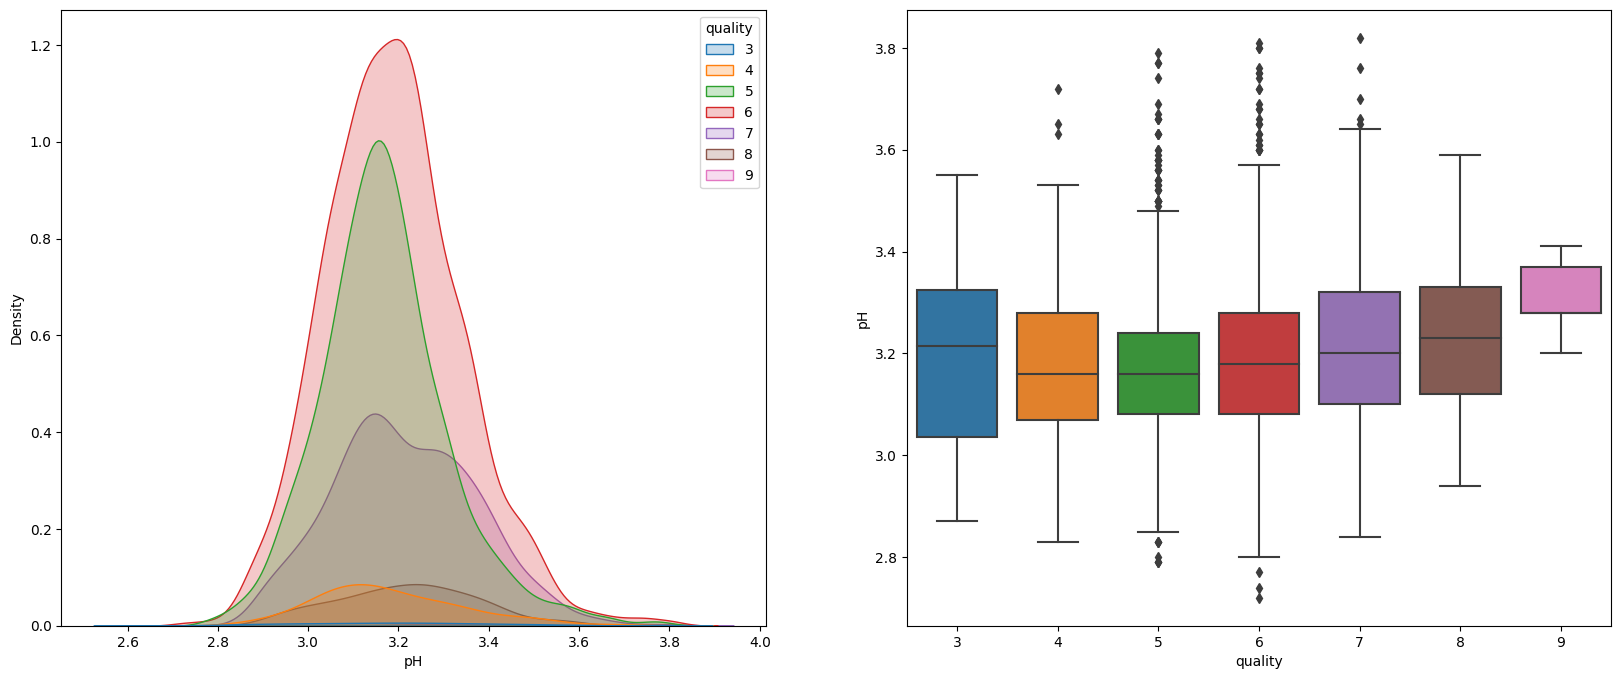

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="pH",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="pH",data=df,ax=ax2);



<ipython-input-195-a0bbaa78459f>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




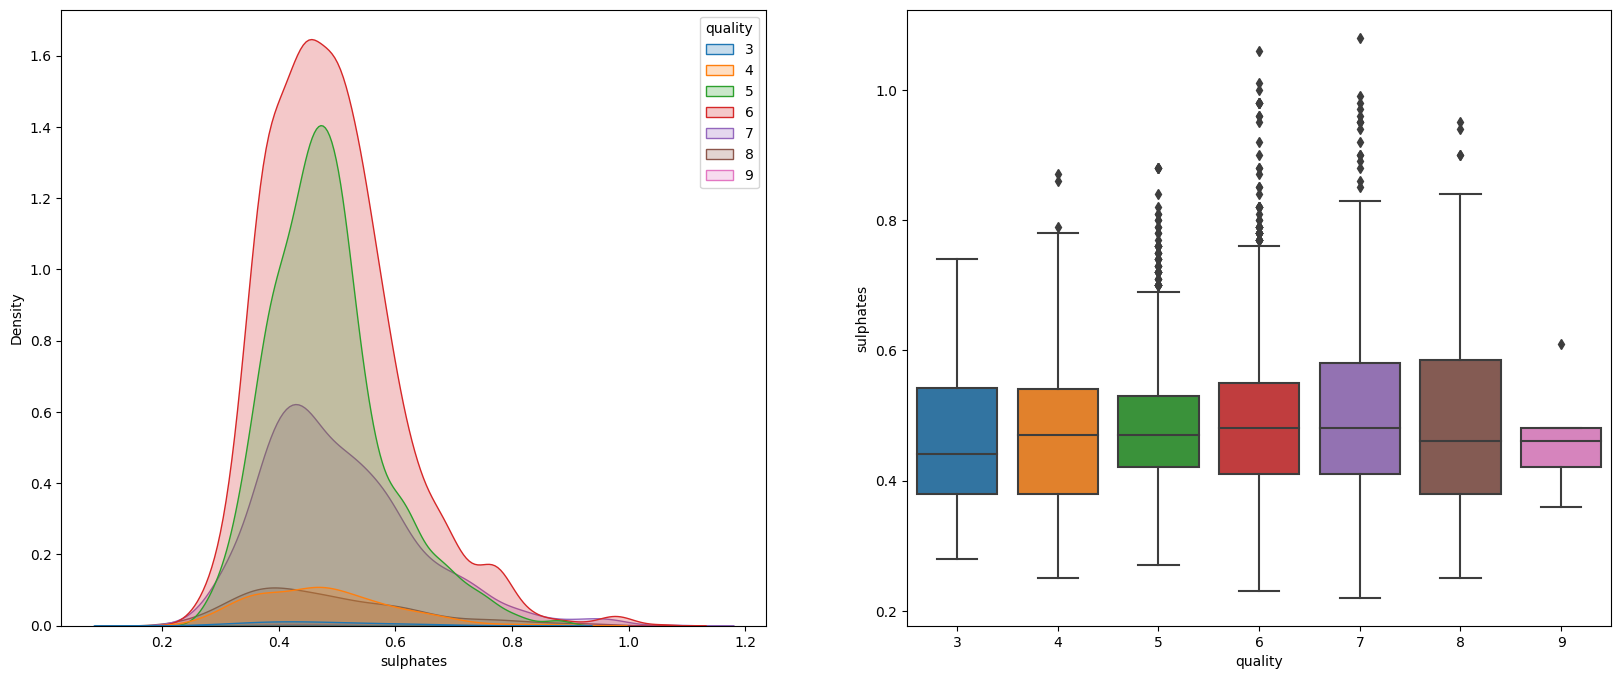

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="sulphates",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="sulphates",data=df,ax=ax2);



<ipython-input-196-eacdce8a14e7>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




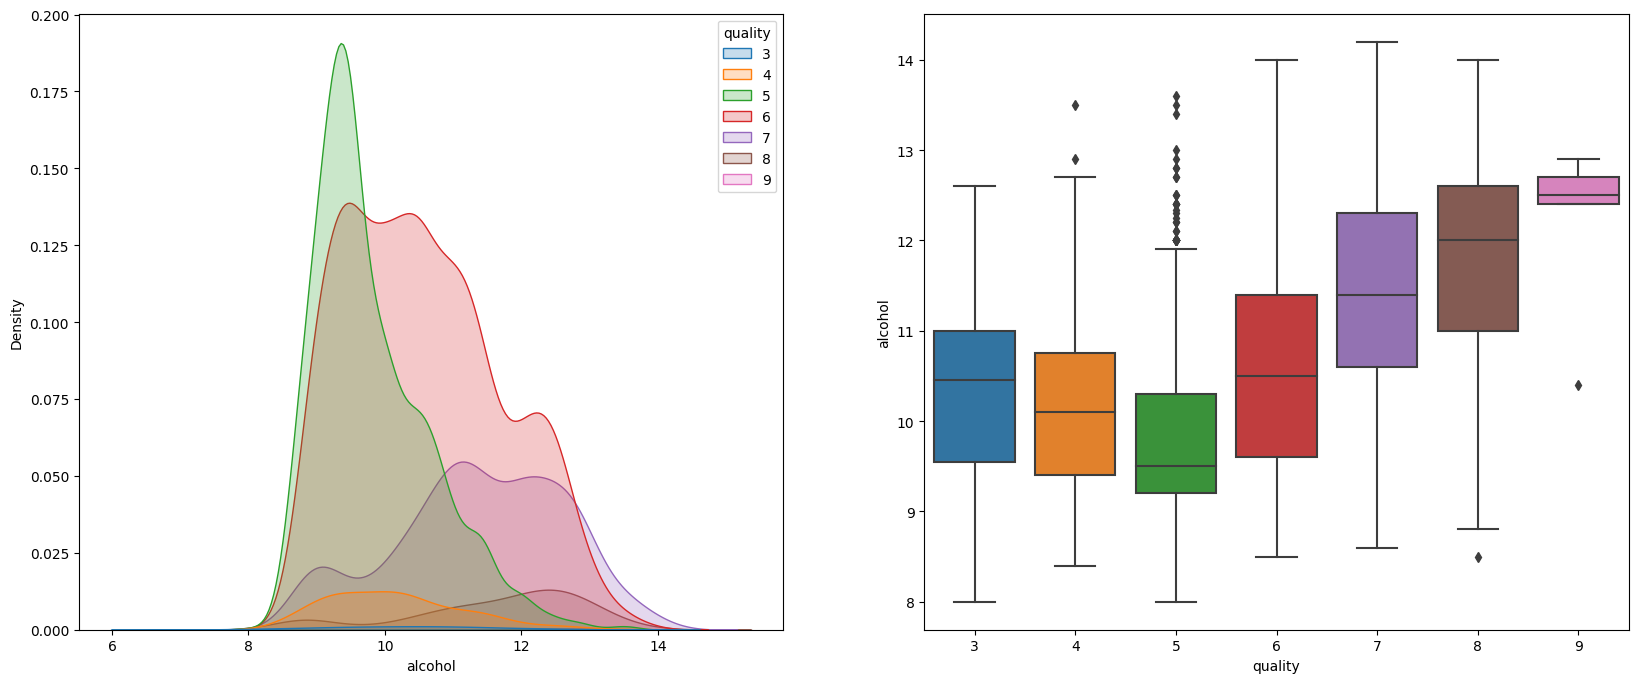

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.kdeplot(data=df,x="alcohol",hue="quality",shade=True,palette="tab10",ax=ax1);
sns.boxplot(x="quality",y="alcohol",data=df,ax=ax2);



# Data Preprocessing

In [ ]:
# To make binary classification of Quality value.
X=df.drop("quality",axis=1)
y=df["quality"].apply(lambda x: 1 if x>6 else 0)
df["quality"]=y



0    3838
1    1060
Name: quality, dtype: int64

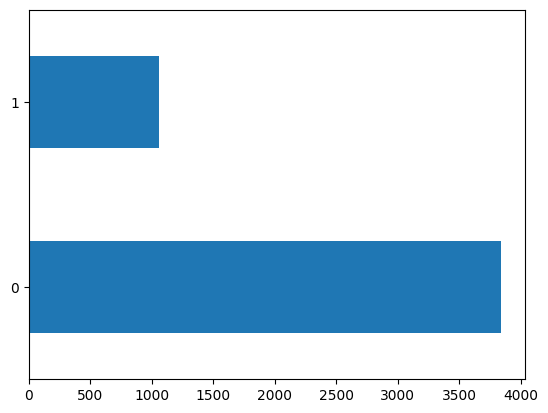

In [ ]:
df["quality"].value_counts().plot.barh( );
df["quality"].value_counts()



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)



#Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


df = pd.DataFrame(df)

# Min-Max normalization
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)


normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
print(X_train_scaled)

[[-0.06188145  1.12200214  0.04528598 ... -0.04862807 -0.43322332
   1.21428771]
 [ 0.05535816  1.32230535 -0.03595508 ...  0.08308626  0.26777052
  -0.89775378]
 [ 0.40707701 -0.48042351 -0.11719613 ...  0.01722909 -0.78372024
  -0.49159196]
 ...
 [ 0.05535816  0.62124413 -0.27967824 ...  1.13680089  0.00489783
   1.45798481]
 [-0.53083991  1.02185054 -0.76712456 ... -0.50962822  0.96876436
  -1.06021851]
 [-0.17912107 -1.08133313  0.69521441 ... -0.97062837 -0.43322332
  -1.30391561]]


In [ ]:
print(X_test_scaled)

[[ 0.75879586  0.02033451  0.61397335 ...  0.60994357 -0.34559909
  -0.1666625 ]
 [ 1.93119201 -0.48042351 -0.44216034 ... -1.03648553 -0.87134447
  -0.00419777]
 [ 0.40707701 -0.68072671  0.04528598 ...  0.41237208 -0.78372024
   0.64566115]
 ...
 [-0.06188145 -0.1799687  -0.76712456 ... -0.04862807  0.26777052
  -0.00419777]
 [-0.64807953 -0.48042351 -1.01084772 ...  1.13680089 -1.39708985
  -0.32912723]
 [ 0.52431662 -0.88102992 -0.6858835  ...  2.25637268  1.49450974
  -0.00419777]]


# Logistic Regression



In [ ]:
loj=LogisticRegression(solver ="liblinear")
loj_model =loj.fit(X_train,y_train)

In [ ]:
loj_model.intercept_

array([-4.01630061])

In [ ]:
loj_model.coef_

array([[-0.15671011, -3.18410555, -0.63133735,  0.04368415, -1.35693703,
         0.01383636, -0.00427401, -4.01827196, -0.21268421,  0.94972508,
         0.82997441]])

In [ ]:
#Prediction
loj_pred=loj_model.predict(X_test)

In [ ]:
confusion_matrix(y_test,loj_pred)

array([[734,  40],
       [160,  46]])

In [ ]:
accuracy_score(y_test,loj_pred)

0.7959183673469388

In [ ]:
loj_score=cross_val_score(loj_model,X_test,y_test,cv=10).mean()
loj_score

0.7928571428571429

In [ ]:
print(classification_report(y_test,loj_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       774
           1       0.53      0.22      0.32       206

    accuracy                           0.80       980
   macro avg       0.68      0.59      0.60       980
weighted avg       0.76      0.80      0.76       980



# SVC



In [ ]:
#svc model
svc_model=SVC(kernel="linear").fit(X_train,y_train)

In [ ]:
svc_pred= svc_model.predict(X_test)

In [ ]:
accuracy_score(y_test,svc_pred)

0.789795918367347

In [ ]:
cross_val_score=cross_val_score(svc_model,X_test,y_test,cv=10).mean()

In [ ]:
print(cross_val_score)

0.789795918367347


In [ ]:
?svc_model

In [ ]:
#model tuning
svc_params={"C":[1,1.1,1.2,1.3],
            "kernel":['linear', 'rbf'],
            "gamma":[1,1.1,1.2,1.3]}

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
svc=SVC()
svc_cv_model=GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 1.1, 1.2, 1.3], 'gamma': [1, 1.1, 1.2, 1.3],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
print("Best parameters:"+ str(svc_cv_model.best_params_))

Best parameters:{'C': 1.3, 'gamma': 1.2, 'kernel': 'rbf'}


In [ ]:
svc_final=SVC(kernel="rbf",C=1,gamma=1.2).fit(X_train,y_train)

In [ ]:
svc_pred_final=svc_final.predict(X_test)

In [ ]:
print(classification_report(y_test,svc_pred_final))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       774
           1       0.84      0.47      0.60       206

    accuracy                           0.87       980
   macro avg       0.86      0.72      0.76       980
weighted avg       0.87      0.87      0.85       980



In [ ]:
accuracy_score(y_test,svc_pred_final)

0.8693877551020408

In [ ]:
from sklearn.model_selection import cross_val_score


In [ ]:
svc_score=cross_val_score(svc_final,X_test,y_test,cv=10).mean()
svc_score

0.8204081632653061

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=10,random_state=30)
model.fit(X_train,y_train)

prediction_test=model.predict(X_test)
print(prediction_test)


[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 1 0 0 

In [ ]:
from sklearn import metrics
rdm_forest = metrics.accuracy_score(y_test,prediction_test)
print("Accuracy=", rdm_forest)

Accuracy= 0.8765306122448979


In [ ]:
feature_list=list(X.columns)
feature_imp=pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)


alcohol                 0.144312
density                 0.130119
chlorides               0.092225
volatile_acidity        0.088549
residual_sugar          0.088277
free_sulfur_dioxide     0.083310
pH                      0.083254
total_sulfur_dioxide    0.081105
sulphates               0.077333
fixed_acidity           0.067416
citric_acid             0.064100
dtype: float64


#Artificial Neural Network Method

#MLPClassifier

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
mlpc=MLPClassifier(max_iter=2000).fit(X_train_scaled,y_train)

In [ ]:
mlpc_pred=mlpc.predict(X_test_scaled)
accuracy_score(y_test,mlpc_pred)

0.85

In [ ]:
#model tuning
?mlpc

*Since the system could not run the code for a long time, we reduced the parameters.

The code we tried:
mlpc_params={"alpha":[0.1,0.01,0.02,0.005,0.0001,0.00001],
            "hidden_layer_sizes":[(10,10,10),(100,100,100),(100,100),(3,5),(5,3)],
            "solver":["adam","lbfgs","sgd"],
            "activation":["logistic","relu"]}
            *

In [ ]:
mlpc_params = {
    "alpha": [0.0001, 0.00001],
    "hidden_layer_sizes": [(100, 100)],
    "solver": ["adam", "lbfgs"],
    "activation": ["logistic"]}

In [ ]:
#same situation in here. original version--->(max_iter=2000)

In [ ]:

sca = MLPClassifier(max_iter=50)
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=5, n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=2000), n_jobs=-1,
             param_grid={'activation': ['logistic'], 'alpha': [0.0001, 1e-05],
                         'hidden_layer_sizes': [(100, 100)],
                         'solver': ['adam', 'lbfgs']},
             verbose=2)

In [ ]:
print("Best parameters:"+ str(mlpc_cv_model.best_params_))

Best parameters:{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [ ]:
mlpc_final=MLPClassifier(activation="relu",alpha=0.0001,hidden_layer_sizes=(100, 100),solver="adam",max_iter=50).fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



In [ ]:
mlpc_final_pred=mlpc_final.predict(X_test_scaled)
accuracy_score(y_test,mlpc_final_pred)

0.8275510204081633

In [ ]:
print(classification_report(y_test,mlpc_final_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       774
           1       0.61      0.51      0.56       206

    accuracy                           0.83       980
   macro avg       0.74      0.71      0.72       980
weighted avg       0.82      0.83      0.82       980



In [ ]:
mlp_score=cross_val_score(mlpc_final,X_test_scaled,y_test,cv=10).mean()
mlp_score

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum ite

0.8020408163265307

#Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)
print(lr.coef_)

0.21796835119958557
[ 0.04869925 -0.0309302  -0.00266815  0.18759991 -0.00424612  0.02680202
 -0.00728114 -0.24392699  0.05952877  0.03235741  0.05630347]


In [ ]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [ ]:
type(y_pred)

numpy.ndarray

In [ ]:
y_test.shape

(980,)

#Naive Bayes Classifier

In [ ]:
pip install scikit-learn

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Accuracy: 0.7244897959183674
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       753
           1       0.39      0.32      0.35       227

    accuracy                           0.72       980
   macro avg       0.59      0.58      0.59       980
weighted avg       0.71      0.72      0.71       980



#ROC CURVE

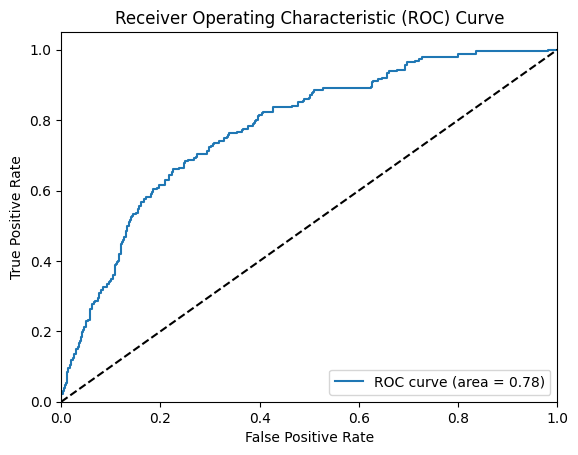

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



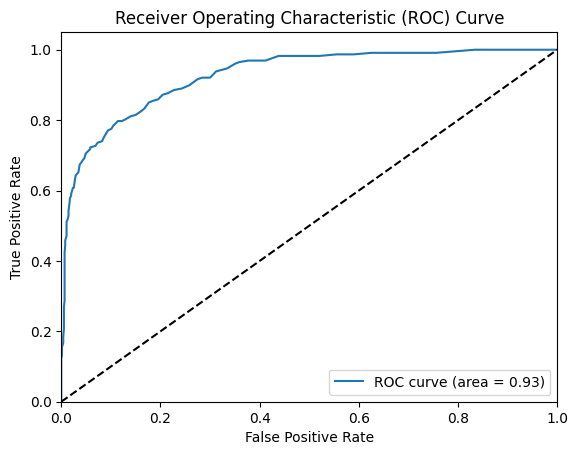

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



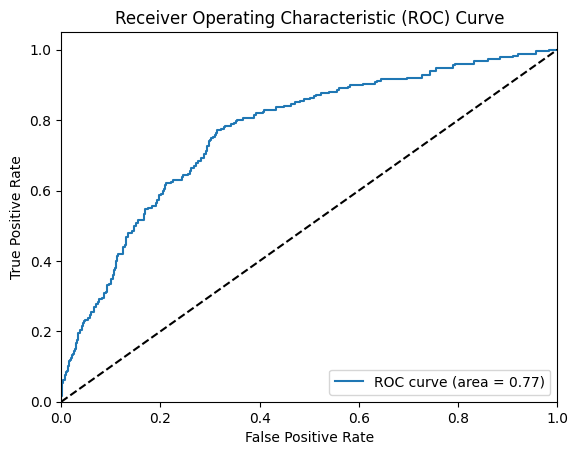

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



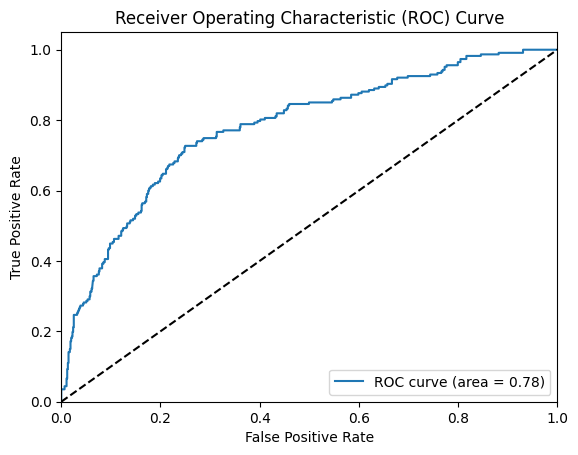

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(probability=True)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



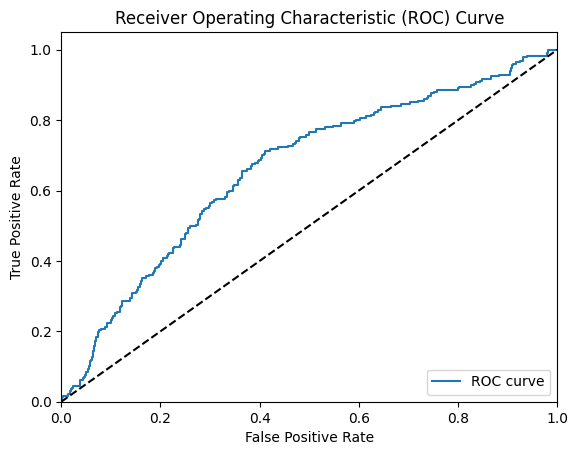

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



#f1 SCORE

In [ ]:
from sklearn.metrics import f1_score
y_pred_binary = model.predict(X_test)
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)


F1 Score: 0.34782608695652173


# RESULT

In [ ]:
scores=[svc_score,loj_score,mlp_score,rdm_forest,lr.intercept_]
print("This is the highest score we found from the methods we used:",max(scores))



This is the highest score we found from the methods we used: 0.8765306122448979
